# Import necessary dependencies

In [0]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
from google.colab import files

uploaded = files.upload()

Saving winequality-red.csv to winequality-red.csv


In [3]:
from google.colab import files

uploaded = files.upload()

Saving winequality-white.csv to winequality-white.csv


# Load and Merge datasets

In [0]:
white_wine = pd.read_csv('winequality-white.csv', sep = ';')
red_wine = pd.read_csv('winequality-red.csv', sep = ';')

## Store wine type as an attribute
red_wine['wine_type'] = 'red'
white_wine['wine_type'] = 'white'

## Bucket wine quality scores into qualitatiev quality labels
red_wine['quality_label'] = red_wine['quality'].apply(
    lambda value: 
    'low' if value <= 5
    else 'medium' if value <= 7
    else 'high'
)

red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'],
                                           categories = ['low', 'medium', 'high'])

white_wine['quality_label'] = white_wine['quality'].apply(
    lambda value:
    'low' if value <= 5
    else 'medium' if value <= 7
    else 'high'
)

white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'],
                                             categories = ['low', 'medium', 'high'])


## Merge red and white wine datasets
wines = pd.concat([red_wine, white_wine])

## Re-shuffle records just to randomize data points
wines = wines.sample(frac = 1, random_state = 2205).reset_index(drop = True)

# Understand dataset features and values

In [5]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.5,0.33,0.38,8.7,0.126,49.0,199.0,0.99711,2.98,0.57,9.4,5,white,low
1,6.5,0.28,0.28,20.4,0.041,40.0,144.0,1.00020,3.14,0.38,8.7,5,white,low
2,6.3,0.14,0.39,1.2,0.044,26.0,116.0,0.99200,3.26,0.53,10.3,6,white,medium
3,6.6,0.42,0.33,2.8,0.034,15.0,85.0,0.99000,3.28,0.51,13.4,6,white,medium
4,6.2,0.27,0.43,7.8,0.056,48.0,244.0,0.99560,3.10,0.51,9.0,6,white,medium


## Understanding Wine and Types

Wine is an alcoholic beverage made from grapes which is fermented without the addition of sugars, acids, enzymes, water, or other nutrients.

Red wine is made from dark red and black grapes. The color usually ranges from various shades of red, brown and violet. This is produced with whole grapes including the skin which adds to the color and flavor of red wines, giving it a rich flavor.

White wine is made from white grapes with no skins or seeds. The color is usually straw-yellow, yellow-green, or yellow-gold. Most white wines have a light and fruity flavor as compared to richer red wines.

## Understanding Wine Attributes and Properties

*   **fixed acidity**: Acids are one of the fundamental properties of wine and contribute greatly to the taste of the wine. Reducing acids significantly might lead to wines tasting flat. Fixed acids include tartaric, malic, citric, and succinic acids which are found in grapes (except succinic). This variable is usually expressed in ![alt text](https://render.githubusercontent.com/render/math?math=%5Cfrac%7Bg%28tartaricacid%29%7D%7Bdm%5E3%7D&mode=inline) in the dataset.




 *   **volatile acidity**: These acids are to be distilled out from the wine before completing the production process. It is primarily constituted of acetic acid though other acids like lactic, formic and butyric acids might also be present. Excess of volatile acids are undesirable and lead to unpleasant flavor. In the US, the legal limits of volatile acidity are 1.2 g/L for red table wine and 1.1 g/L for white table wine. The volatile acidity is expressed in ![alt text](https://render.githubusercontent.com/render/math?math=%5Cfrac%7Bg%28aceticacid%29%7D%7Bdm%5E3%7D&mode=inline) in the dataset.




*   **citric acid**: This is one of the fixed acids which gives a wine its freshness. Usually most of it is consumed during the fermentation process and sometimes it's added separately to give the wine more freshness. It's usually expressed in ![alt text](https://render.githubusercontent.com/render/math?math=%5Cfrac%7Bg%7D%7Bdm%5E3%7D&mode=inline) in the dataset.



*   **residual sugar**: This typically refers to the natural sugar from grapes which remains after the fermentation process stops, or is stopped. It's usually expressed in ![alt text](https://render.githubusercontent.com/render/math?math=%5Cfrac%7Bg%7D%7Bdm%5E3%7D&mode=inline) in the dataset.



*   **chlorides**: This is usually a major contributor to saltiness in wine. It's usually expressed in ![alt text](https://render.githubusercontent.com/render/math?math=%5Cfrac%7Bg%28sodiumchloride%29%7D%7Bdm%5E3%7D&mode=inline) in the dataset.



*   **free sulfur dioxide**: This is the part of the sulfur dioxide that when added to a wine is said to be free after the remaining part binds. Winemakers will always try to get the highest proportion of free sulfur to bind. They are also known as sulfites and too much of it is undesirable and gives a pungent odour. This variable is expressed in ![alt text](https://render.githubusercontent.com/render/math?math=%5Cfrac%7Bmg%7D%7Bdm%5E3%7D&mode=inline) in the dataset.



*   **total sulfur dioxide**: This is the sum total of the bound and the free sulfur dioxide,  ![alt text](https://render.githubusercontent.com/render/math?math=SO_2&mode=inline). Here, it's expressed in ![alt text](https://render.githubusercontent.com/render/math?math=%5Cfrac%7Bmg%7D%7Bdm%5E3%7D&mode=inline). This is mainly added to kill harmful bacteria and preserve quality and freshness. There are usually legal limits for sulfur levels in wines and excess of it can even kill good yeast and give out undesirable odour. 



*   **density**: This can be represented as a comparison of the weight of a specific volume of wine to an equivalent volume of water. It is generally used as a measure of the conversion of sugar to alcohol. Here, it's expressed in ![alt text](https://render.githubusercontent.com/render/math?math=%5Cfrac%7Bg%7D%7Bcm%5E3%7D&mode=inline).



*   **pH**: Also known as the potential of hydrogen, this is a numeric scale to specify the acidity or basicity of the wine. Fixed acidity contributes the most towards the pH of wines. You might know, solutions with a pH < 7 are acidic, while solutions with a pH > 7 are basic. With a pH of 7, pure water is neutral. Most wines have a pH between 2.9 and 3.9 and are therfore acidic.



*   **sulphates**: These are mineral salts containing sulfur. Sulphates are to wine as gluten is to food. They are a regular part of winemaking around the world and are considered essential. They are connected to the fermentation process and affect the wine aroma and flavor. Here, it's expressed in ![alt text](https://render.githubusercontent.com/render/math?math=%5Cfrac%7Bg%28potassiumsulphate%29%7D%7Bdm%5E3%7D&mode=inline) in the dataset.



*   **alcohol**: Wine is an alcoholic beverage. Alcohol is formed as a result of yeast converting sugar during the fermentation process. The percentage of alcohol can vary from wine to wine. Hence, it's not a surprise for this attribute to be a part of this dataset. It's usually measured in % vol or alcohol by volume (ABV).



*   **quality**: Wine experts graded the wine quality between 0 (very bad) and 10 (excellent). The eventual quality score is the median of at least 3 evaluations made by the same wine experts.



*   **wine_type**: Since we originally had 2 datasets for red and white wine, we introduced this attribute in the final merged dataset which indicates the type of wine for each data point. A wine can either be a 'red' or a 'white' wine. 



*   **quality_label**: This is a derived attribute from the ***quality*** attribute. We bucket or group wine quality scores into 3 qualitative bucket, namely low, medium and high. Wines with a quality score of 3, 4 & 5 are low quality, scores of 6 & 7 are medium quality and scores of 8 & 9 are high quality wines.



# Exploratory Data Analysis and Visualizations

## Descriptive Statistics

In [6]:
subset_attributes = ['residual sugar', 'total sulfur dioxide',
                     'sulphates', 'alcohol', 'volatile acidity',
                     'quality']

rs = round(red_wine[subset_attributes].describe(), 2)
ws = round(white_wine[subset_attributes].describe(), 2)
pd.concat([rs, ws], axis = 1,
          keys = ['Red Wine Statistics',
                  'White Wine Statistics'])

Red Wine Statistics                       ... White Wine Statistics         
           residual sugar total sulfur dioxide  ...      volatile acidity  quality
count             1599.00              1599.00  ...               4898.00  4898.00
mean                 2.54                46.47  ...                  0.28     5.88
std                  1.41                32.90  ...                  0.10     0.89
min                  0.90                 6.00  ...                  0.08     3.00
25%                  1.90                22.00  ...                  0.21     5.00
50%                  2.20                38.00  ...                  0.26     6.00
75%                  2.60                62.00  ...                  0.32     6.00
max                 15.50               289.00  ...                  1.10     9.00

[8 rows x 12 columns]

In [7]:
subset_attributes = ['alcohol', 'volatile acidity', 'pH',
                     'quality']

ls = round(wines[wines['quality_label'] == 'low'][subset_attributes].describe(), 2)

ms = round(wines[wines['quality_label'] == 'medium'][subset_attributes].describe(), 2)

hs = round(wines[wines['quality_label'] == 'high'][subset_attributes].describe(), 2)

pd.concat([ls, ms, hs], axis = 1,
          keys = ['Low Quality Wine',
                  'Medium Quality Wine'
                  'High Quality Wine'])

Low Quality Wine                   ... Medium Quality WineHigh Quality Wine         
               alcohol volatile acidity  ...                                   pH  quality
count          2384.00          2384.00  ...                              3915.00  3915.00
mean              9.87             0.40  ...                                 3.22     6.28
std               0.84             0.19  ...                                 0.16     0.45
min               8.00             0.10  ...                                 2.72     6.00
25%               9.30             0.26  ...                                 3.11     6.00
50%               9.60             0.34  ...                                 3.21     6.00
75%              10.40             0.50  ...                                 3.33     7.00
max              14.90             1.58  ...                                 4.01     7.00

[8 rows x 8 columns]

# Univariate Analysis

## Visualizing one dimension

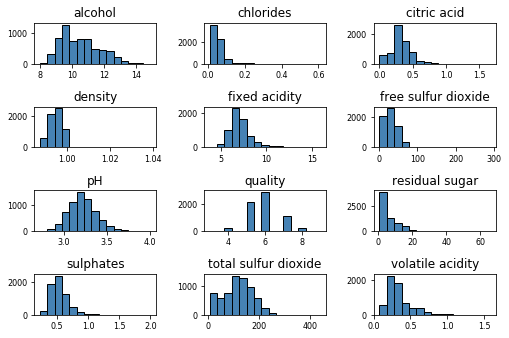

In [8]:
wines.hist(bins = 15, color = 'steelblue', 
           edgecolor = 'black', linewidth = 1.0,
           xlabelsize = 8, ylabelsize = 8,
           grid = False)

plt.tight_layout(rect = (0, 0, 1.2, 1.2))

## A) Continuous, numeric attribute in 1-D

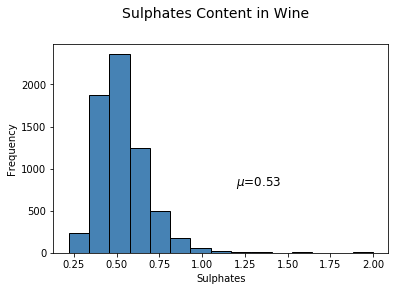

In [9]:
## Histogram

fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Sulphates Content in Wine", 
                     fontsize = 14)
fig.subplots_adjust(top = 0.85, wspace = 0.3)

ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel("Sulphates")
ax.set_ylabel("Frequency")
ax.text(1.2, 800, r'$\mu$=' + str(round(wines['sulphates'].mean(), 2)),
        fontsize = 12)

freq, bins, patches = ax.hist(wines['sulphates'], 
                              color = 'steelblue', bins = 15,
                              edgecolor = 'black', 
                              linewidth = 1)

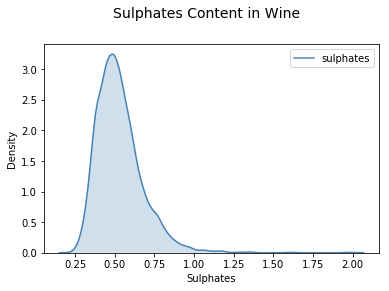

In [10]:
## Density Plot

fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Sulphates Content in Wine", 
                     fontsize = 14)
fig.subplots_adjust(top = 0.85, wspace = 0.3)

ax1 = fig.add_subplot(1, 1, 1)
ax1.set_xlabel("Sulphates")
ax1.set_ylabel("Density")

sns.kdeplot(wines['sulphates'],
            ax = ax1, shade = True, 
            color = 'steelblue')

## B) Discrete, categorical attribute in 1-D

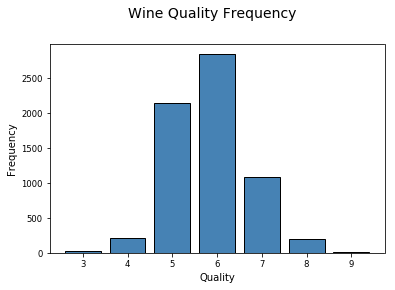

In [11]:
## Bar Plot

fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Wine Quality Frequency",
                     fontsize = 14)
fig.subplots_adjust(top = 0.85, wspace = 0.3)

ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel("Quality")
ax.set_ylabel("Frequency")
w_q = wines['quality'].value_counts()
w_q = (list(w_q.index), list(w_q.values))
ax.tick_params(axis = 'both', which = 'major',
               labelsize = 8.5)

bar = ax.bar(w_q[0], w_q[1], 
             color = 'steelblue', edgecolor = 'black',
             linewidth = 1)

# Multivariate Analysis

## Visualizing two dimensions

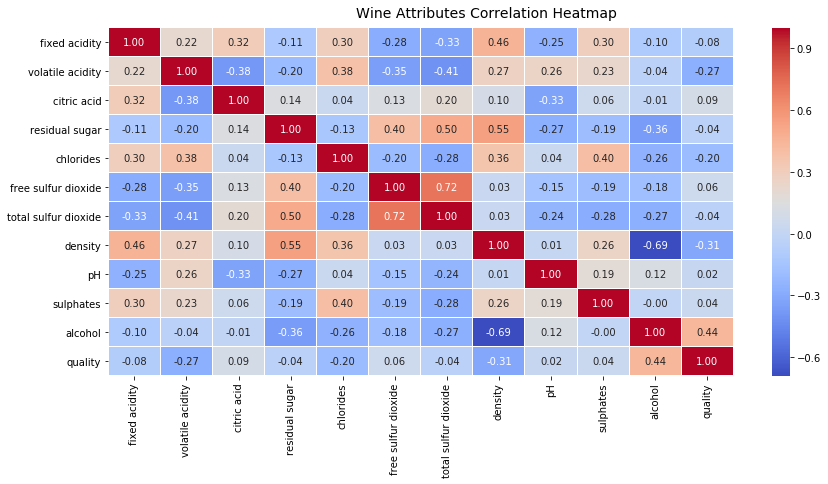

In [12]:
## Correlation Matrix Heatmap

f, ax = plt.subplots(figsize = (14, 6))
corr = wines.corr()

hm = sns.heatmap(round(corr, 2), annot = True,
                 ax = ax, cmap = "coolwarm",
                 fmt = '.2f', linewidths = .05)
f.subplots_adjust(top = 0.93)
t = f.suptitle('Wine Attributes Correlation Heatmap',
               fontsize = 14)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


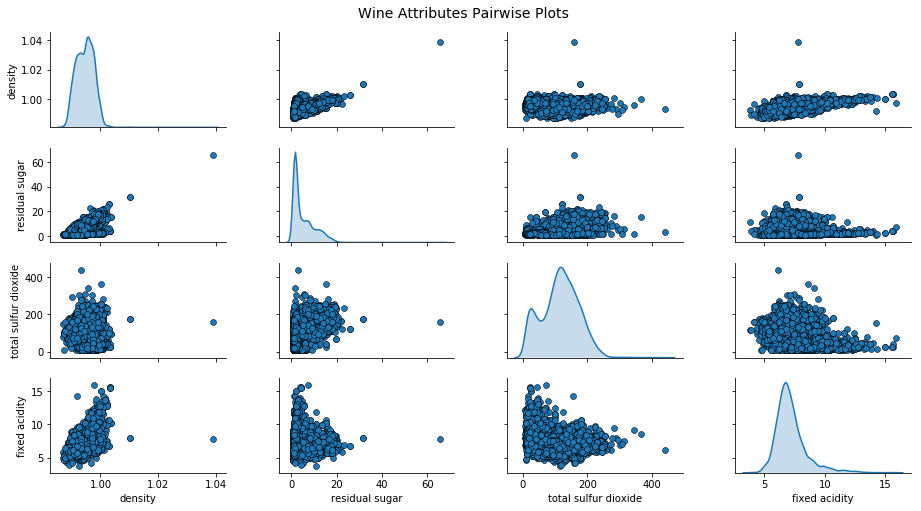

In [13]:
## Pair-wise Scatter Plots

cols = ['density', 'residual sugar', 
        'total sulfur dioxide', 'fixed acidity']

pp = sns.pairplot(wines[cols], size = 1.8,
                  aspect = 1.8, 
                  plot_kws = dict(edgecolor = "k",
                                  linewidth = 0.5),
                  diag_kind = "kde",
                  diag_kws = dict(shade = True))

fig = pp.fig
fig.subplots_adjust(top = 0.93, wspace = 0.3)
t = fig.suptitle('Wine Attributes Pairwise Plots',
                 fontsize = 14)

In [14]:
## Scaling attribute values to avoid few outliers

cols = ['density', 'residual sugar',
        'total sulfur dioxide', 'fixed acidity']
subset_df = wines[cols]


from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

scaled_df = ss.fit_transform(subset_df)
scaled_df = pd.DataFrame(scaled_df, columns = cols)
final_df = pd.concat([scaled_df, wines['wine_type']],
                     axis = 1)
final_df.head()

,density,residual sugar,total sulfur dioxide,fixed acidity,wine_type
0,0.804873,0.684563,1.473091,0.219614,white
1,1.835408,3.143870,0.499941,-0.551792,white
2,-0.899345,-0.891916,0.004519,-0.706073,white
3,-1.566358,-0.555601,-0.543983,-0.474652,white
4,0.301278,0.495385,2.269304,-0.783214,white


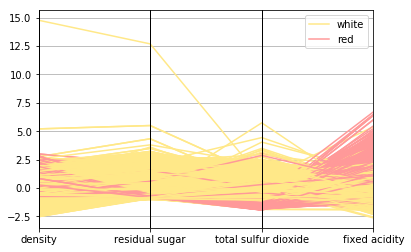

In [15]:
## Plot parallel coordinates

from pandas.plotting import parallel_coordinates

pc = parallel_coordinates(final_df, 'wine_type',
                          color = ('#FFE888', '#FF9999'))

In [16]:
subset_attributes = ['density', 'residual sugar',
                     'total sulfur dioxide', 'fixed acidity']

redwines = round(red_wine[subset_attributes].describe(), 4)
whitewines = round(white_wine[subset_attributes].describe(), 4)

table = pd.concat([redwines, whitewines], axis = 1,
                  keys = ['Red Wine Statistics',
                          'White Wine Statistics'])
table

Red Wine Statistics                 ... White Wine Statistics              
                  density residual sugar  ...  total sulfur dioxide fixed acidity
count           1599.0000      1599.0000  ...             4898.0000     4898.0000
mean               0.9967         2.5388  ...              138.3607        6.8548
std                0.0019         1.4099  ...               42.4981        0.8439
min                0.9901         0.9000  ...                9.0000        3.8000
25%                0.9956         1.9000  ...              108.0000        6.3000
50%                0.9968         2.2000  ...              134.0000        6.8000
75%                0.9978         2.6000  ...              167.0000        7.3000
max                1.0037        15.5000  ...              440.0000       14.2000

[8 rows x 8 columns]

## A) Two Continuous Numeric attributes

Text(0.5, 1.05, 'Wine Sulpates - Alcohol Content')

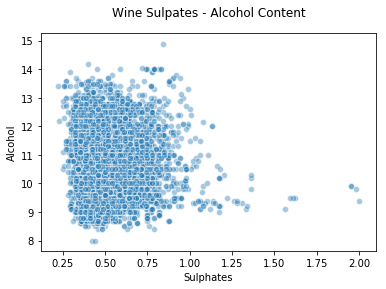

In [17]:
## Scatter Plot

plt.scatter(wines['sulphates'], wines['alcohol'],
            alpha = 0.4, edgecolors = 'w')

plt.xlabel('Sulphates')
plt.ylabel('Alcohol')
plt.title('Wine Sulpates - Alcohol Content', y = 1.05)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


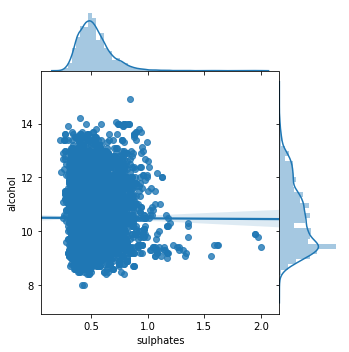

In [18]:
## Joint Plot

jp = sns.jointplot(x = 'sulphates', y = 'alcohol',
                   data = wines, kind = 'reg',
                   space = 0, size = 5,
                   ratio = 4)

## B) Two Discrete Categorical attributes

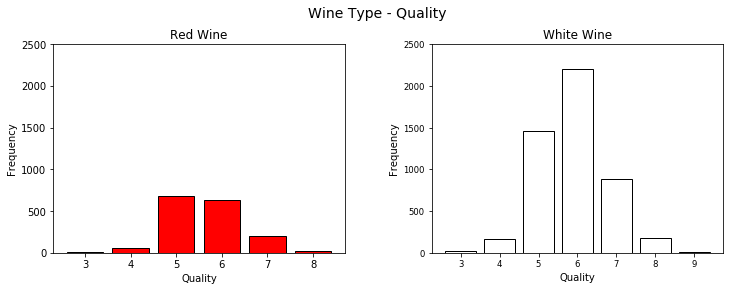

In [19]:
## Using subplots or facets along with Bar Plots

fig = plt.figure(figsize = (12, 4))
title = fig.suptitle("Wine Type - Quality", fontsize = 14)
fig.subplots_adjust(top = 0.85, wspace = 0.3)


## Red wine - Wine quality
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Red Wine")
ax1.set_xlabel("Quality")
ax1.set_ylabel("Frequency")
rw_q = red_wine['quality'].value_counts()
rw_q = (list(rw_q.index), list(rw_q.values))
ax1.set_ylim([0, 2500])
ax.tick_params(axis = 'both', which = 'major',
               labelsize = 8.5)
bar1 = ax1.bar(rw_q[0], rw_q[1],
               color = 'red', edgecolor = 'black',
               linewidth = 1)


## White wine - Wine quality
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("White Wine")
ax2.set_xlabel("Quality")
ax2.set_ylabel("Frequency")
ww_q = white_wine['quality'].value_counts()
ww_q = (list(ww_q.index), list(ww_q.values))
ax2.set_ylim([0, 2500])
ax2.tick_params(axis = 'both', which = 'major', 
                labelsize = 8.5)
bar2 = ax2.bar(ww_q[0], ww_q[1],
               color = 'white', edgecolor = 'black',
               linewidth = 1)

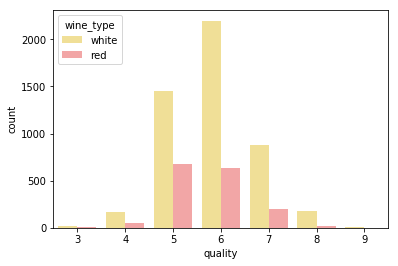

In [20]:
## Multi-bar Plot

cp = sns.countplot(x = "quality", hue = "wine_type",
                   data = wines,
                   palette = {"red": "#FF9999", 
                              "white": "#FFE888"})

## C) Mixed attributes (numeric & categorical)

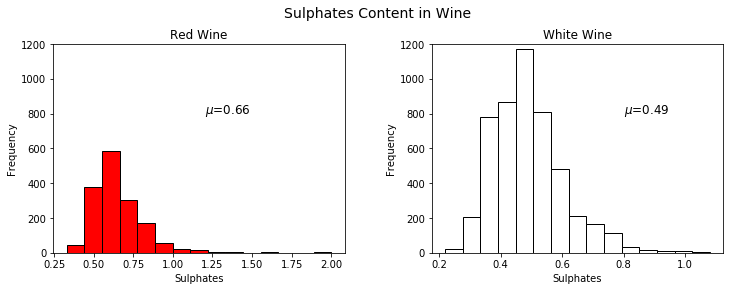

In [21]:
## Facets with Histograms

fig = plt.figure(figsize = (12, 4))
title = fig.suptitle("Sulphates Content in Wine",
                     fontsize = 14)
fig.subplots_adjust(top = 0.85, wspace = 0.3)


ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Red Wine")
ax1.set_xlabel("Sulphates")
ax1.set_ylabel("Frequency")
ax1.set_ylim([0, 1200])
ax1.text(1.2, 800, 
         r'$\mu$=' + str(round(red_wine['sulphates'].mean(), 2)),
         fontsize = 12)
r_freq, r_bins, r_patches = ax1.hist(red_wine['sulphates'],
                                     color = 'red', bins = 15,
                                     edgecolor = 'black', linewidth = 1)


ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("White Wine")
ax2.set_xlabel("Sulphates")
ax2.set_ylabel("Frequency")
ax2.set_ylim([0, 1200])
ax2.text(0.8, 800,
         r'$\mu$=' + str(round(white_wine['sulphates'].mean(), 2)),
         fontsize = 12)
w_freq, w_bins, w_patches = ax2.hist(white_wine['sulphates'],
                                     color = 'white', bins = 15,
                                     edgecolor = 'black', linewidth = 1)

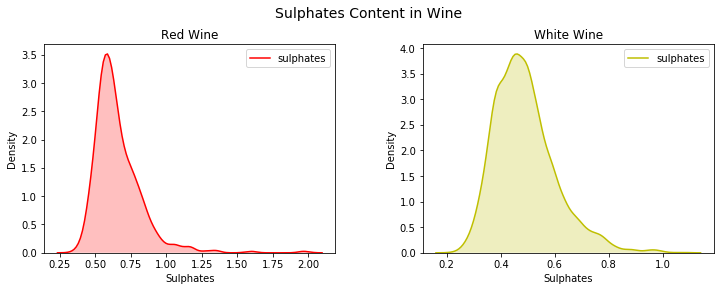

In [22]:
## Facets with Density Plots

fig = plt.figure(figsize = (12, 4))
title = fig.suptitle("Sulphates Content in Wine", 
                     fontsize = 14)
fig.subplots_adjust(top = 0.85, wspace = 0.3)


ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Red Wine")
ax1.set_xlabel("Sulphates")
ax1.set_ylabel("Density")
sns.kdeplot(red_wine['sulphates'], ax = ax1,
            shade = True, color = 'r')

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("White Wine")
ax2.set_xlabel("Sulphates")
ax2.set_ylabel("Density")
sns.kdeplot(white_wine['sulphates'], ax = ax2,
            shade = True, color = 'y')

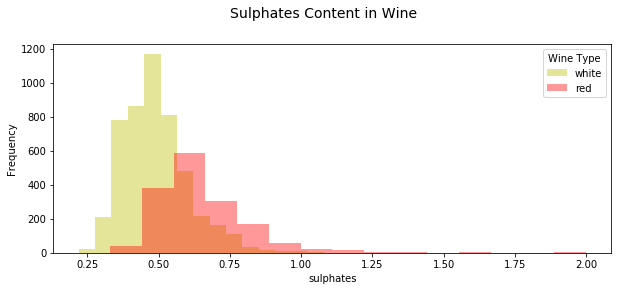

In [23]:
## Using multiple Histograms

fig = plt.figure(figsize = (10, 4))
title = fig.suptitle("Sulphates Content in Wine",
                     fontsize = 14)
fig.subplots_adjust(top = 0.85, wspace = 0.3)
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel("Sulphates")
ax.set_ylabel("Frequency")


g = sns.FacetGrid(wines, hue = 'wine_type',
                  palette = {"red": "r", "white": "y"})
g.map(sns.distplot, 'sulphates', 
      kde = False, bins = 15, 
      ax = ax)
ax.legend(title = 'Wine Type')
plt.close(2)

Text(0, 0.5, 'Wine Alcohol %')

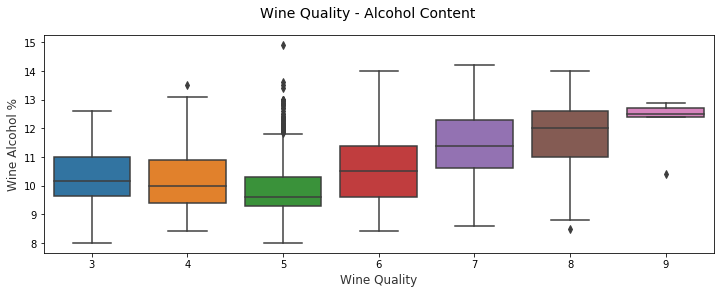

In [24]:
## Box Plots

f, (ax) = plt.subplots(1, 1, figsize = (12, 4))
f.suptitle('Wine Quality - Alcohol Content',
           fontsize = 14)

sns.boxplot(x = "quality", y = "alcohol",
            data = wines, ax = ax)
ax.set_xlabel("Wine Quality", size = 12, 
              alpha = 0.8)
ax.set_ylabel("Wine Alcohol %", size = 12, 
              alpha = 0.8)

Text(0, 0.5, 'Wine Sulphates')

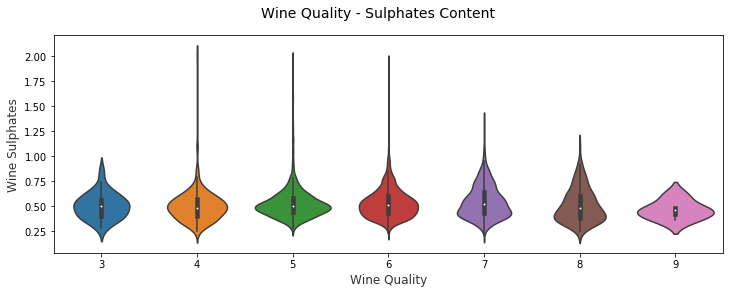

In [25]:
## Violin Plot

f, (ax) = plt.subplots(1, 1, figsize = (12, 4))
f.suptitle('Wine Quality - Sulphates Content',
           fontsize = 14)

sns.violinplot(x = "quality", y = "sulphates",
               data = wines, ax = ax)
ax.set_xlabel("Wine Quality", size = 12,
              alpha = 0.8)
ax.set_ylabel("Wine Sulphates", size = 12,
              alpha = 0.8)

## Visualizing three dimensions

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


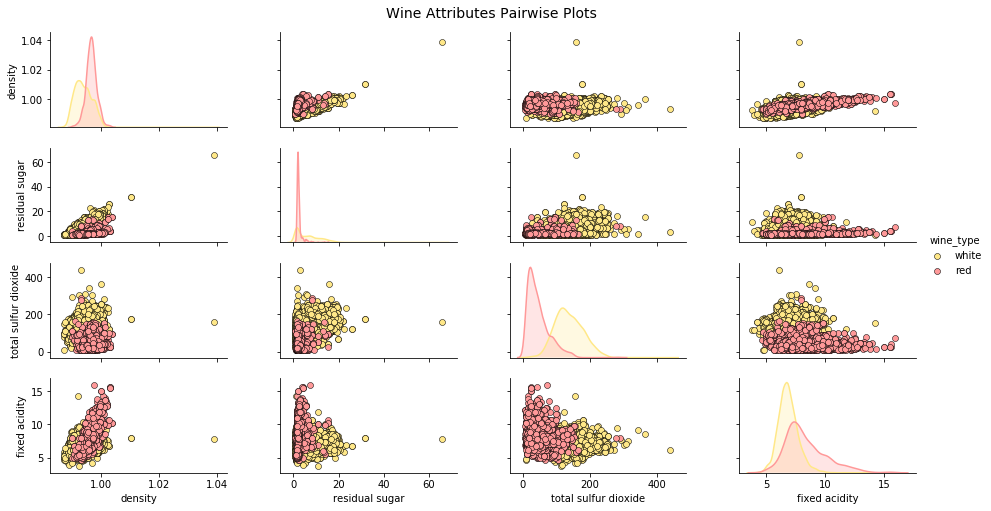

In [26]:
## Scatter Plot with Hue for visualizing data in 3-D

cols = ['density', 'residual sugar',
        'total sulfur dioxide', 'fixed acidity',
        'wine_type']

pp = sns.pairplot(wines[cols], hue = 'wine_type',
                  size = 1.8, aspect = 1.8,
                  palette = {"red": "#FF9999",
                             "white": "#FFE888"},
                  plot_kws = dict(edgecolor = "black",
                                  linewidth = 0.5))

fig = pp.fig
fig.subplots_adjust(top = 0.93, wspace = 0.3)
t = fig.suptitle('Wine Attributes Pairwise Plots',
                 fontsize = 14)

## A) Three Continuous Numeric attributes

Text(0.5, 0, 'Alcohol')

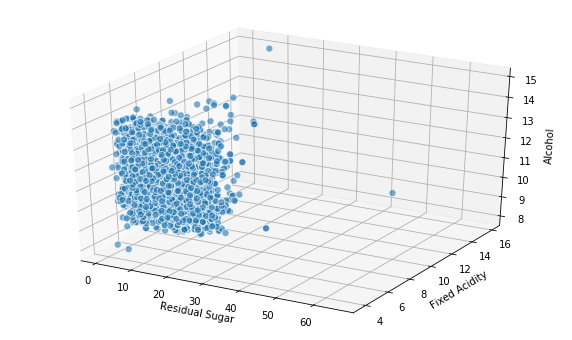

In [27]:
## Visualizing 3-D numeric data with Scatter Plots
## Length, breadth and depth

fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111, projection = '3d')

xs = wines['residual sugar']
ys = wines['fixed acidity']
zs = wines['alcohol']
ax.scatter(xs, ys, zs, 
           s = 50, alpha = 0.6,
           edgecolors = 'w')

ax.set_xlabel('Residual Sugar')
ax.set_ylabel('Fixed Acidity')
ax.set_zlabel('Alcohol')

Text(0.5, 1.05, 'Wine Alcohol Content - Fixed Acidity - Residual Sugar')

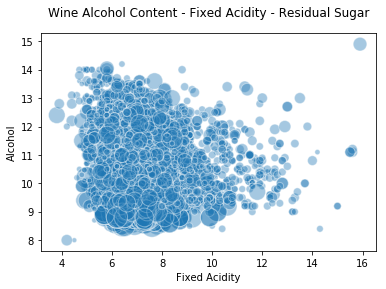

In [28]:
## Visualizing 3-D numeric data with a Bubble Chart
## Length, breadth and size

plt.scatter(wines['fixed acidity'], wines['alcohol'],
            s = wines['residual sugar'] * 25,
            alpha = 0.4, edgecolors = 'w')

plt.xlabel('Fixed Acidity')
plt.ylabel('Alcohol')
plt.title('Wine Alcohol Content - Fixed Acidity - Residual Sugar',
          y = 1.05)

## B) Three Discrete Categorical attributes

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


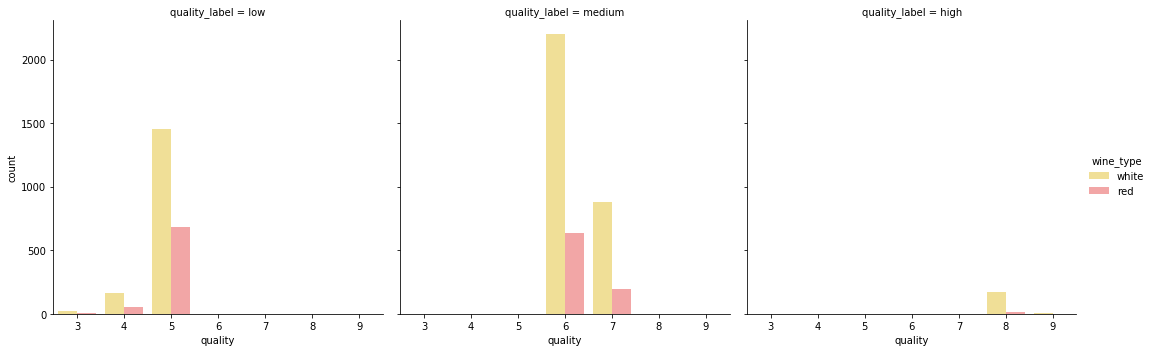

In [29]:
## Visualizing 3-D categorical data using Bar Plots
## leveraging the concepts of hue and facets

fc = sns.factorplot(x = "quality", hue = "wine_type",
                    col = "quality_label",
                    data = wines, kind = "count",
                    palette = {"red": "#FF9999",
                               "white": "#FFE888"})

## C) Mixed attributes (Numeric & Categorical)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


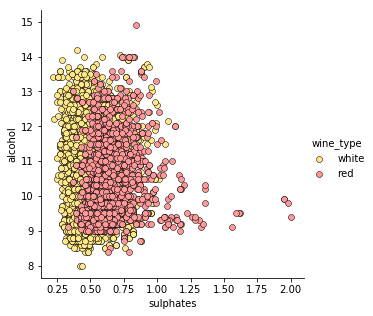

In [30]:
## Visualizing 3-D mix data using Scatter Plots
## leveraging the concepts of hue for categorical dimension

jp = sns.pairplot(wines, 
                  x_vars = ["sulphates"], 
                  y_vars = ["alcohol"],
                  size = 4.5, hue = "wine_type",
                  palette = {"red": "#FF9999",
                             "white": "#FFE888"},
                  plot_kws = dict(edgecolor = "k",
                                  linewidth = 0.5))

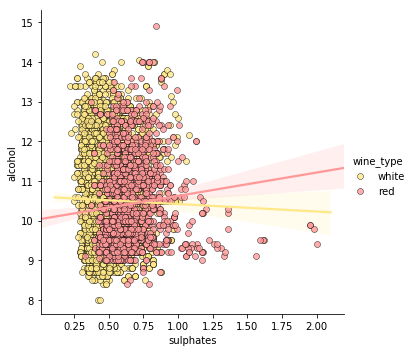

In [31]:
## We can also view relationships / correlations as needed

lp = sns.lmplot(x = 'sulphates', y = 'alcohol',
                hue = 'wine_type',
                palette = {"red": "#FF9999", 
                           "white": "#FFE888"},
                data = wines, fit_reg = True,
                legend = True,
                scatter_kws = dict(edgecolor = "k",
                                   linewidth = 0.5))

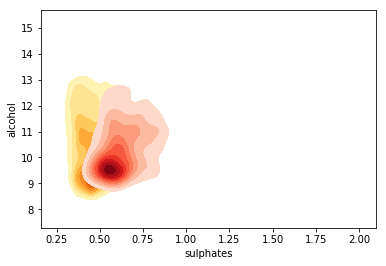

In [32]:
## Visualizing 3-D mix data using Kernel Density Plots
## leveraging the concepts of hue for categorical dimension

ax = sns.kdeplot(white_wine['sulphates'], white_wine['alcohol'],
                 cmap = "YlOrBr", shade = True,
                 shade_lowest = False)

ax = sns.kdeplot(red_wine['sulphates'], red_wine['alcohol'],
                 cmap = "Reds", shade = True,
                 shade_lowest = False)

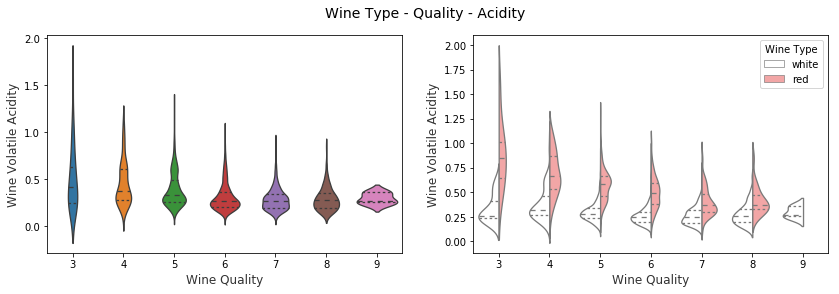

In [33]:
## Visualizing 3-D mix data using Violin Plots
## leveraging the concepts of hue and axes for 
## > 1 categorical dimensions

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 4))
f.suptitle('Wine Type - Quality - Acidity',
           fontsize = 14)

sns.violinplot(x = "quality", y = "volatile acidity",
               data = wines, inner = "quart",
               linewidth = 1.3, ax = ax1)
ax1.set_xlabel("Wine Quality", size = 12, 
               alpha = 0.8)
ax1.set_ylabel("Wine Volatile Acidity", size = 12,
               alpha = 0.8)


sns.violinplot(x = "quality", y = "volatile acidity",
               hue = "wine_type", data = wines,
               split = True, inner = "quart",
               linewidth = 1.3,
               palette = {"red": "#FF9999",
                          "white": "white"}, ax = ax2)
ax2.set_xlabel("Wine Quality", size = 12,
               alpha = 0.8)
ax2.set_ylabel("Wine Volatile Acidity", size = 12,
               alpha = 0.8)

l = plt.legend(loc = 'upper right', title = 'Wine Type')

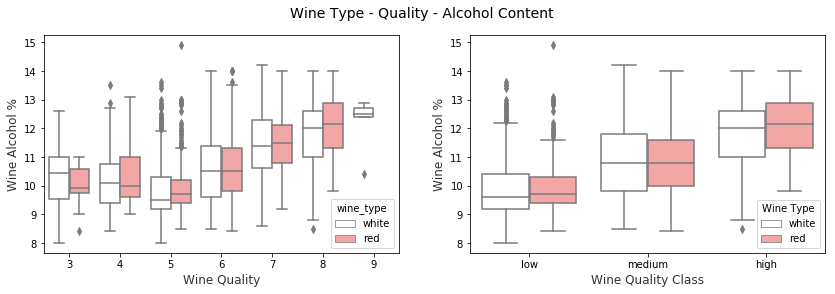

In [34]:
## Visualizing 3-D mix data using Box Plots
## leveraging the concepts of hue and axes for 
## > 1 categorical dimensions

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 4))
f.suptitle('Wine Type - Quality - Alcohol Content',
           fontsize = 14)


sns.boxplot(x = "quality", y = "alcohol",
            hue = "wine_type", data = wines,
            palette = {"red": "#FF9999",
                       "white": "white"}, ax = ax1)
ax1.set_xlabel("Wine Quality", size = 12,
               alpha = 0.8)
ax1.set_ylabel("Wine Alcohol %", size = 12,
               alpha = 0.8)


sns.boxplot(x = "quality_label", y = "alcohol",
            hue = "wine_type", data = wines,
            palette = {"red": "#FF9999",
                       "white": "white"}, ax = ax2)
ax2.set_xlabel("Wine Quality Class", size = 12,
               alpha = 0.8)
ax2.set_ylabel("Wine Alcohol %", size = 12,
               alpha = 0.8)

l = plt.legend(loc = 'best', title = 'Wine Type')

## Visualizing four dimensions

Text(0.5, 0, 'Fixed Acidity')

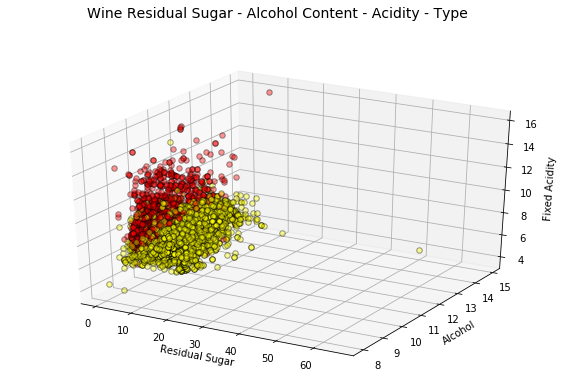

In [35]:
## Visualizing 4-D mix data using Scatter Plots
## leveraging the concepts of hue and depth

fig = plt.figure(figsize = (10, 6))
t = fig.suptitle('Wine Residual Sugar - Alcohol Content - Acidity - Type',
                 fontsize = 14)
ax = fig.add_subplot(111, projection = '3d')


xs = list(wines['residual sugar'])
ys = list(wines['alcohol'])
zs = list(wines['fixed acidity'])
data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]
colors = ['red' if wt == 'red' else 'yellow'
          for wt in list(wines['wine_type'])]


for data, color in zip(data_points, colors):
  x, y, z = data
  ax.scatter(x, y, z, 
             alpha = 0.4, c = color,
             edgecolors = 'none', s = 30)

ax.set_xlabel('Residual Sugar')
ax.set_ylabel('Alcohol')
ax.set_zlabel('Fixed Acidity')

Text(0.5, 1.05, 'Wine Alcohol Content - Fixed Acidity - Residual Sugar - Type')

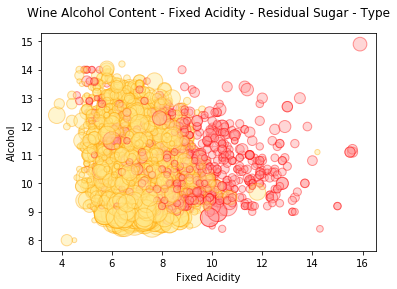

In [36]:
## Visualizing 4-D mix data using Bubble Plots
## leveraging the concepts of hue and size

size = wines['residual sugar'] * 25

fill_colors = ['#FF9999' if wt == 'red' else '#FFE888'
               for wt in list(wines['wine_type'])]
edge_colors = ['red' if wt == 'red' else 'orange'
               for wt in list(wines['wine_type'])]

plt.scatter(wines['fixed acidity'], wines['alcohol'],
            s = size, alpha = 0.4,
            color = fill_colors, 
            edgecolors = edge_colors)

plt.xlabel('Fixed Acidity')
plt.ylabel('Alcohol')
plt.title('Wine Alcohol Content - Fixed Acidity - Residual Sugar - Type',
          y = 1.05)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


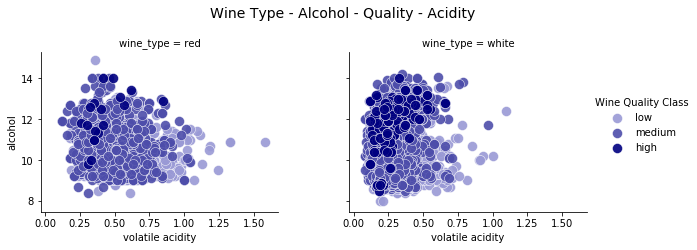

In [37]:
## Visualizing 4-D mix data using Scatter Plots
## leveraging the concepts of hue and facets for 
## > 1 categorical attributes

g = sns.FacetGrid(wines, col = "wine_type",
                  hue = 'quality_label',
                  col_order = ['red', 'white'],
                  hue_order = ['low', 'medium', 'high'],
                  aspect = 1.2, size = 3.5,
                  palette = sns.light_palette('navy', 4)[1:])

g.map(plt.scatter, 
      "volatile acidity", "alcohol",
      alpha = 0.9, edgecolor = 'white',
      linewidth = 0.5, s = 100)
fig = g.fig
fig.subplots_adjust(top = 0.8, wspace = 0.3)
fig.suptitle('Wine Type - Alcohol - Quality - Acidity',
             fontsize = 14)
l = g.add_legend(title = "Wine Quality Class")

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


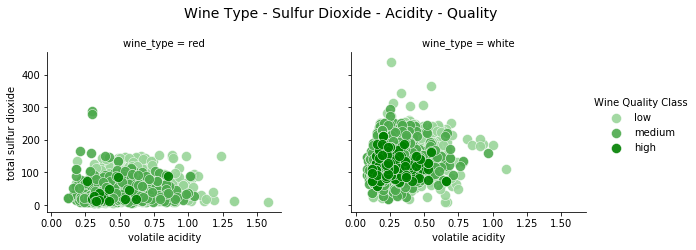

In [38]:
## Visualizing 4-D mix data using Scatter Plots
## leveraging the concepts of hue and facets
## for > 1 categorical attributes

g = sns.FacetGrid(wines, col = "wine_type",
                  hue = 'quality_label',
                  col_order = ['red', 'white'],
                  hue_order = ['low', 'medium', 'high'],
                  aspect = 1.2, size = 3.5,
                  palette = sns.light_palette('green', 4)[1:])

g.map(plt.scatter, 
      "volatile acidity", "total sulfur dioxide",
      alpha = 0.9, edgecolor = 'white',
      linewidth = 0.5, s = 100)
fig = g.fig
fig.subplots_adjust(top = 0.8, wspace = 0.3)
fig.suptitle('Wine Type - Sulfur Dioxide - Acidity - Quality',
             fontsize = 14)
l = g.add_legend(title = 'Wine Quality Class')

## Visualizing five dimensions

Text(0.5, 0, 'Fixed Acidity')

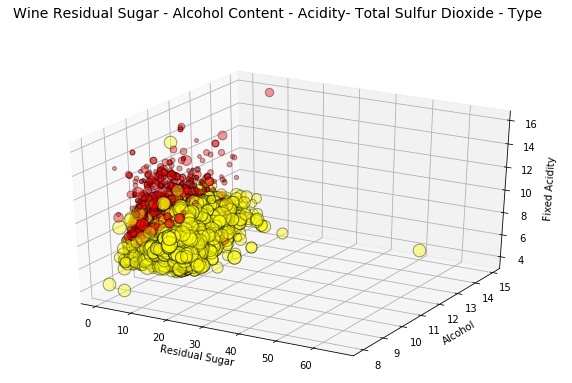

In [39]:
## Visualizing 5-D mix data using Bubble Charts
## leveraging the concepts of depth, hue and size

fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111, projection = '3d')
t = fig.suptitle('Wine Residual Sugar - Alcohol Content - Acidity\
- Total Sulfur Dioxide - Type',
                 fontsize = 14)


xs = list(wines['residual sugar'])
ys = list(wines['alcohol'])
zs = list(wines['fixed acidity'])
data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]


ss = list(wines['total sulfur dioxide'])
colors = ['red' if wt == 'red' else 'yellow'
          for wt in list(wines['wine_type'])]

for data, color, size in zip(data_points, colors, ss):
  x, y, z = data
  ax.scatter(x, y, z,
             alpha = 0.4, c = color,
             edgecolors = 'none', s = size)
  
ax.set_xlabel('Residual Sugar')
ax.set_ylabel('Alcohol')
ax.set_zlabel('Fixed Acidity')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


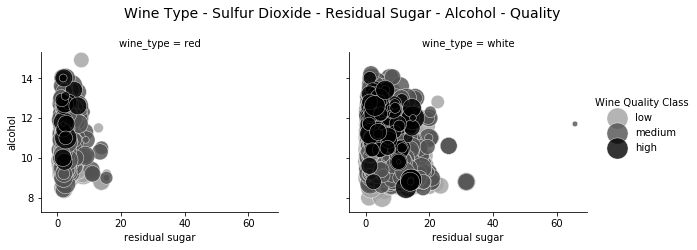

In [40]:
## Visualizing 5-D mix data using Bubble Charts
## leveraging the concepts of hue, size and facets

g = sns.FacetGrid(wines, col = "wine_type",
                  hue = 'quality_label',
                  col_order = ['red', 'white'],
                  hue_order = ['low', 'medium', 'high'],
                  aspect = 1.2, size = 3.5,
                  palette = sns.light_palette('black', 4)[1:])

g.map(plt.scatter, 
      "residual sugar", "alcohol",
      alpha = 0.8, edgecolor = 'white',
      linewidth = 0.5,
      s = wines['total sulfur dioxide'] * 2)
fig = g.fig
fig.subplots_adjust(top = 0.8, wspace = 0.3)
fig.suptitle('Wine Type - Sulfur Dioxide - Residual Sugar\
 - Alcohol - Quality',
             fontsize = 14)
l = g.add_legend(title = 'Wine Quality Class')

## Visualizing six dimensions

Text(0.5, 0, 'Fixed Acidity')

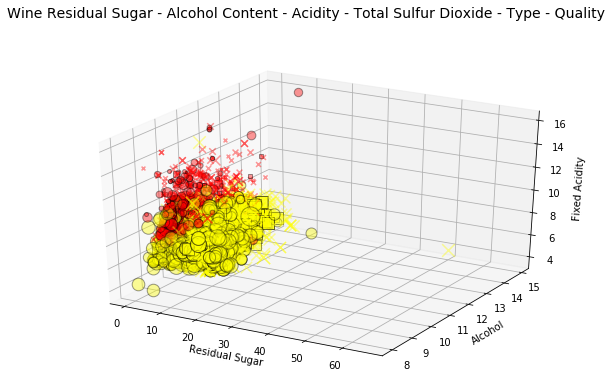

In [41]:
## Visualizing 6-D mix data using Scatter Charts
## leveraging the concepts of hue, size, depth and shape

fig = plt.figure(figsize = (10, 6))
t = fig.suptitle('Wine Residual Sugar - Alcohol Content - Acidity\
 - Total Sulfur Dioxide - Type - Quality',
                 fontsize = 14)
ax = fig.add_subplot(111, projection = '3d')

xs = list(wines['residual sugar'])
ys = list(wines['alcohol'])
zs = list(wines['fixed acidity'])
data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]

ss = list(wines['total sulfur dioxide'])
colors = ['red' if wt == 'red' else 'yellow'
          for wt in list(wines['wine_type'])]
markers = [',' if q == 'high' else 'x' if q == 'medium'
           else 'o' for q in list(wines['quality_label'])]


for data, color, size, mark in zip(data_points, colors, ss, markers):
  x, y, z = data
  ax.scatter(x, y, z, 
             alpha = 0.4, c = color,
             edgecolors = 'none', s = size,
             marker = mark)
  
ax.set_xlabel('Residual Sugar')
ax.set_ylabel('Alcohol')
ax.set_zlabel('Fixed Acidity')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


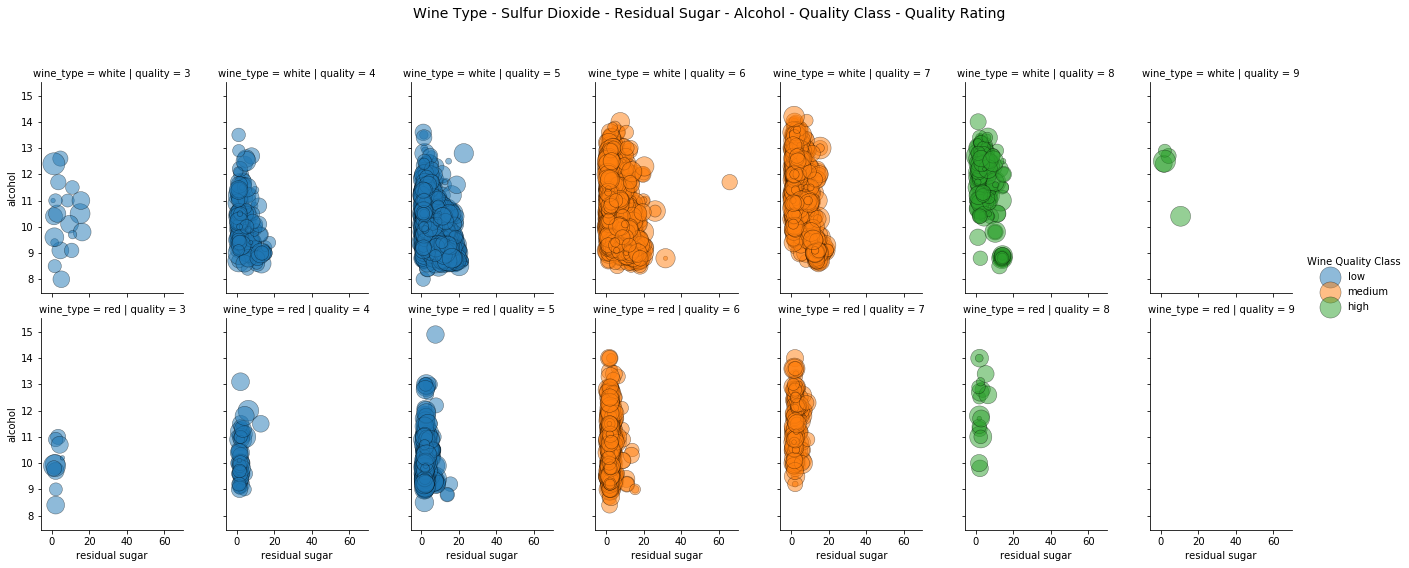

In [42]:
## Visualizing 6-D mix data using Scatter Charts
## leveraging the concepts of hue, facets and size

g = sns.FacetGrid(wines, 
                  row = 'wine_type', col = "quality",
                  hue = 'quality_label', size = 4)

g.map(plt.scatter,
      "residual sugar", "alcohol",
      alpha = 0.5, edgecolor = 'k',
      linewidth = 0.5,
      s = wines['total sulfur dioxide'] * 2)

fig = g.fig
fig.set_size_inches(18, 8)
fig.subplots_adjust(top = 0.85, wspace = 0.3)
fig.suptitle('Wine Type - Sulfur Dioxide - Residual Sugar -\
 Alcohol - Quality Class - Quality Rating',
             fontsize = 14)
l = g.add_legend(title = 'Wine Quality Class')